In [79]:
import pandas as pd
import os 
from datetime import date, datetime, timedelta
import datetime
import math
import scipy.stats
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

import re
import folium
from folium import plugins
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import earthpy as et


### Step 1 
Data Collection and Flow Verification: Verify NWM freshwater flow predictions for
the study region using contemporary and historic forecasts for all NWMF points with publicly
available (USGS, SFWMD) gauging data; quantify NMWF spatiotemporal performance and
diagnose any substantial mis-matches (e.g., does NWMF predict Caloosahatchee River flow given
scheduled Lake Okeechobee releases?)

In [ ]:
[10247723,16809757,16809761,16839180,16814933,16768588,10247055,16768574,16767914,16767848,10245491,10244463]

In [61]:
data = pd.DataFrame({
    "COAWST_inputs": ['Caloosahatchee River', 'Peace River', 'Hunter Creek', 'Myakka River','Shell Creek', 'Imperial River',
                        'Orange River', 'Hendry Creek',' Estero River', 'Mullock Creek', 'Whiskey Creek', 'Billy Creek'],
    "NWM_ID": [10247723,16809757,16809761,16839180,16814933,16768588,10247055,16768574,16767914,16767848,10245491,10244463],
    "lat": [26.7234, 27.0156, 27.0081, 27.0217, 26.9839, 26.3395, 26.6862, 26.4745, 26.4340, 26.4705, 26.5764, 26.6511],
    "long":[-81.7023, -81.9846, -81.9788, -82.2745, -81.9514, -81.8242, -81.7439, -81.8811, -81.8446, -81.8555, -81.8988, -81.8536]
    
})

data   

,COAWST_inputs,NWM_ID,lat,long
0,Caloosahatchee River,10247723,26.7234,-81.7023
1,Peace River,16809757,27.0156,-81.9846
2,Hunter Creek,16809761,27.0081,-81.9788
3,Myakka River,16839180,27.0217,-82.2745
4,Shell Creek,16814933,26.9839,-81.9514
5,Imperial River,16768588,26.3395,-81.8242
6,Orange River,10247055,26.6862,-81.7439
7,Hendry Creek,16768574,26.4745,-81.8811
8,Estero River,16767914,26.4340,-81.8446
9,Mullock Creek,16767848,26.4705,-81.8555


In [72]:
data.to_csv('COAWST_inputs.csv', index = False, header = True)

In [48]:
USGS = pd.read_csv("USGS_locations.csv")

In [56]:
# add marker one by one on the map
for i in range(0,len(data)):
    folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['long']],
      popup=data.iloc[i]['COAWST_inputs'], 
      icon=folium.Icon(color = "green")
   ).add_to(m)

for i in range(0,len(USGS)):
    folium.Marker(
      location=[USGS.iloc[i]['lat'], USGS.iloc[i]['long']],
      popup=USGS.iloc[i]['SiteName'], 
      icon=folium.Icon(color = "blue")
   ).add_to(m)

### Map showing the NWM stream reaches used in the COAWST model and the closest USGS gages

- Green -> COAWST model NWM reaches
- Blue -> USGS sites

In [58]:
m

In [81]:
def flow_plot(df, NWM_list):
    dfCopy = df.copy()
    fig, ax = plt.subplots(figsize=(20,14))

    ax.plot(dfCopy['PredictionDate_3days'].to_numpy(),
           dfCopy[col_list].to_numpy(),
           alpha=0.9)
    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    ax.xaxis.set_minor_locator(fmt_month)

    # Text in the x axis will be displayed in 'YYYY-mm' format.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


    ax.set_xlabel('Date')
    ax.set_ylabel('Predicted Flow Rate (m3/s)')
    
#     location = dfCopy['SiteName'].loc[dfCopy['USGS_ID'] == USGS_ID][:1].item()
    ax.set_title('All Predicted Peace Flows vs Time')
#     ax.legend(['Peace Main', 'Peace Zolfo', 'Peace Arcadia'])
    fig.autofmt_xdate()
    
    plt.rc('font', size=14) 
    plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
    plt.rc('axes', titlesize=14)     # fontsize of the axes title
    plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
    plt.show()

NameError: name 'col_list' is not defined

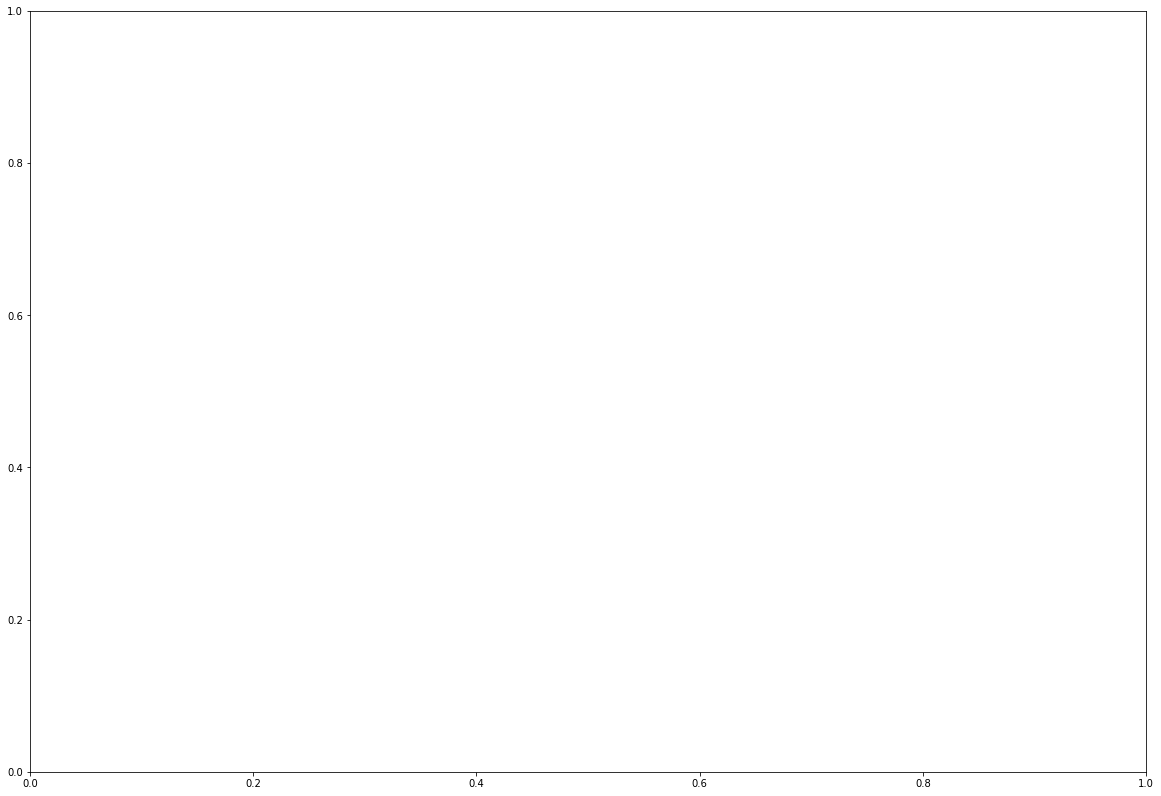

In [82]:
flow_plot(sf, [16838908, 16837572])

In [73]:
sf = pd.read_csv("Streamflow_20210717.csv")

In [74]:
sf

,NWM_ID,datetime,predicted_flow,PredictionDate_3days,SiteName,USGS_ID,qualifiers,observed_flow
0,16768068,2021-04-01 00:00:00,0.03,2021-04-04 00:00:00,"IMPERIAL RIVER NEAR BONITA SPRINGS, FL",2291500,A,0.3289
1,16768068,2021-04-01 06:00:00,0.03,2021-04-04 06:00:00,"IMPERIAL RIVER NEAR BONITA SPRINGS, FL",2291500,A,0.3313
2,16768068,2021-04-01 12:00:00,0.03,2021-04-04 12:00:00,"IMPERIAL RIVER NEAR BONITA SPRINGS, FL",2291500,A,0.3313
3,16768068,2021-04-01 18:00:00,0.03,2021-04-04 18:00:00,"IMPERIAL RIVER NEAR BONITA SPRINGS, FL",2291500,A,0.3247
4,16768068,2021-04-02 00:00:00,0.03,2021-04-05 00:00:00,"IMPERIAL RIVER NEAR BONITA SPRINGS, FL",2291500,A,0.3273
...,...,...,...,...,...,...,...,...
58179,16838908,2021-06-05 18:00:00,0.00,2021-06-08 18:00:00,"MYAKKA RIVER NEAR SR 72 NEAR SARASOTA, FL",2298830,P,0.3733
58180,16837572,2021-06-05 18:00:00,0.00,2021-06-08 18:00:00,MYAKKA RIVER AT CONTROL NEAR LAUREL FL,2298880,P,0.1225
58181,16814857,2021-06-05 18:00:00,0.00,2021-06-08 18:00:00,SHELL CREEK NEAR PUNTA GORDA FL,2298202,P,0.8027
58182,10247723,2021-06-05 18:00:00,0.18,2021-06-08 18:00:00,"CALOOSAHATCHEE RIVER AT S-79, NR.OLGA, FLA",2292900,P,28.8501
